In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from datafb.home import data_home0_diwa_steps_div

In [2]:
from datafb import data_retraining_top1, data_retraining_diwa, robust_lp, data_retraining_diwa_llr, robust_lp_diwa, robust_lp_top1

In [3]:
from codeplot.plot import *
import matplotlib.pyplot as plt


In [15]:
def plot_iter(ll_m, key1, orders=None, add_legend=True, key_axis1="acc", key_axis2=None, labels=None, key_annot=None, legends=None, title=None):

    if labels is None:
        labels = [str(i) for i in range(len(ll_m))]
    if orders is None:
        orders = ["no", "no"]
    if not isinstance(orders, list):
        orders = [orders for i in range(len(ll_m))]
    fig, ax1 = plt.subplots()
    plt.xlabel(dict_key_to_label.get(key1, key1), fontsize="x-large")
    colors = cm.rainbow(np.linspace(0.3, 1, len(ll_m)))
    ax1.set_ylabel(dict_key_to_label.get(key_axis1, key_axis1), fontsize="x-large")

    def plot_with_int(l, ax, color, label, key2, marker, linestyle, order):
        t = get_x(l, key1)
        if t == []:
            return

        l = [ll for ll in l if key2 in ll]
        ax.scatter(
            get_x(l, key1),
            get_x(l, key2),
            color=color,
            label=label,
            marker=marker
        )
        if key_annot:
            n = len(get_x(l, key1))
            for i in range(n):
                ax.annotate(get_x(l, key_annot)[i], (get_x(l, key1)[i], get_x(l, key2)[i]), color=color)

        if order != "no":
            fit_and_plot(key1, key2, l, order=order, label=label, color=color, ax=ax, linestyle=linestyle)
    
    for i, l_m in enumerate(ll_m):
        plot_with_int(
            l_m,
            ax1,
            color=colors[i],
            label=dict_key_to_label.get(i, labels[i]),
            key2=key_axis1,
            marker=".",
            order=orders[0],
            linestyle="-"
        )
    if key_axis1 in dict_key_to_limit:
        ax1.set_ylim(dict_key_to_limit[key_axis1])
    
    if key_axis2:
        ax2 = ax1.twinx()
        ax2.set_ylabel(dict_key_to_label.get(key_axis2, key_axis2), fontsize="x-large")

        for i, l_m in enumerate(ll_m):
            plot_with_int(
                l_m,
                ax2,
                color=colors[i],
                label=dict_key_to_label.get(i, labels[i]),
                key2=key_axis2,
                marker="x",
                order=orders[-1],
                linestyle="--"
            )
        if key_axis2 in dict_key_to_limit:
            ax2.set_ylim(dict_key_to_limit[key_axis2])
    if key1 in dict_key_to_limit:
        plt.xlim(dict_key_to_limit[key1])
    if add_legend:
        legend1 = ax1.legend(fontsize="x-large", loc="lower left")
        title1 = dict_key_to_label.get(key_axis1)
        if legends:
             title1= legends[0]
        legend1.set_title(title1, prop = {'size':15})
        if key_axis2:
            title2 = dict_key_to_label.get(key_axis2)
            if legends:
                title2 = legends[1]
            legend2 = ax2.legend(fontsize="x-large", loc="lower right")
            legend2.set_title(title2, prop = {'size':15})
    if title:
        fig.suptitle(title, fontsize=20)
    return fig

In [8]:
dict_key_to_label["acc_ens"] = "ENS OOD test acc."

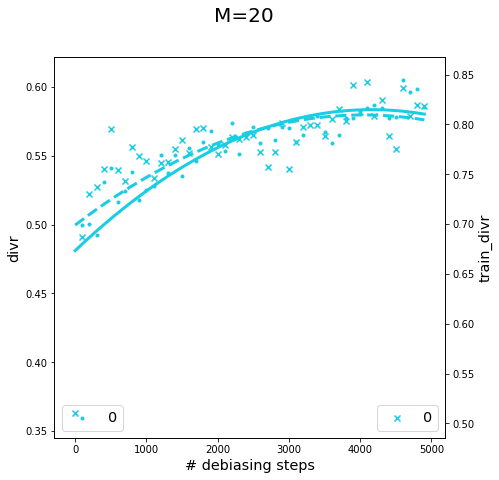

In [20]:
fig = plot_iter([data_home0_diwa_steps_div.l], "step", key_axis1="divr", orders=2, key_axis2="train_divr", labels=None, title="M=20")

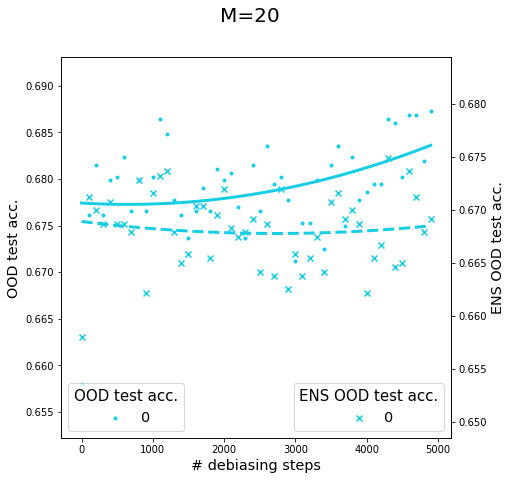

In [11]:
fig = plot_iter([data_home0_diwa_steps_div.l], "step", key_axis1="acc", orders=2, key_axis2="acc_ens", labels=None, title="M=20")

In [5]:
dict_key_to_label = {"robust": "Robust Coeff", "step":"# debiasing steps","acc": "OOD test acc.", "length": "# training runs", "testin_acc": "OOD train acc.", "train_acc": "IID val acc."}
#dict_key_to_limit = {"step": [-10, 5000], "acc": [0.68, 0.76], "train_acc": [0.67, 0.87]}

In [6]:

robust_keys_diwa = [0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5]# 2]
ll_m_top1 = [data_retraining_top1.l[key] for key in robust_keys_diwa]
ll_m_diwa = [data_retraining_diwa.l[key] for key in robust_keys_diwa]


robust_keys = [0, 0.25, 0.5, 0.75, 1.0]
ll_m_llr = [data_retraining_diwa_llr.l[key] for key in robust_keys]

robust_keys_lp = [0, 5, 10, 15, 20, 30, 40]
ll_m_r_diwa = [robust_lp_diwa.l[key] for key in robust_keys_lp]
ll_m_r_top1 = [robust_lp_top1.l[key] for key in robust_keys_lp]
labels_robust_keys_lp = [key/20 for key in robust_keys_lp]

In [7]:
plt.rcParams["figure.figsize"] = (6,4)

In [ ]:
dict_key_to_limit = {"step": [1, 5000], "acc": [0.63, 0.7], "train_acc": [0.67, 0.87]}
fig = plot_iter(ll_m_r_top1, "step", key_axis1="acc", key_axis2=None, labels=labels_robust_keys_lp,
               legends=["Robust Coeff"], title="Top 1")

In [ ]:
dict_key_to_limit = {"step": [1, 5000], "acc": [0.63, 0.7], "train_acc": [0.8, 0.87]}
fig = plot_iter(ll_m_r_top1, "step", key_axis1="train_acc", key_axis2=None, labels=labels_robust_keys_lp,
               legends=["Robust Coeff"], title=None)

In [ ]:
dict_key_to_limit = {"step": [1, 5000], "acc": [0.7, 0.76], "train_acc": [0.67, 0.87]}
fig = plot_iter(ll_m_llr, "step", orders=["2", "2"], key_axis1="train_acc", labels=robust_keys)

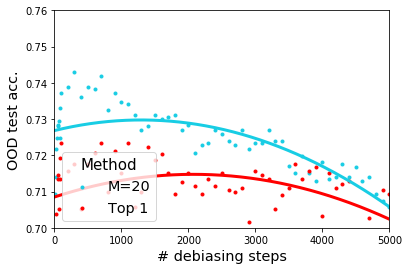

In [20]:
dict_key_to_limit = {"step": [1, 5000], "acc": [0.7, 0.76], "train_acc": [0.67, 0.87]}
fig = plot_iter(ll_m_diwa[:1] + ll_m_top1[:1], "step", orders=["2", "2"], key_axis1="acc", labels=["M=20", "Top 1"], legends=["Method"])

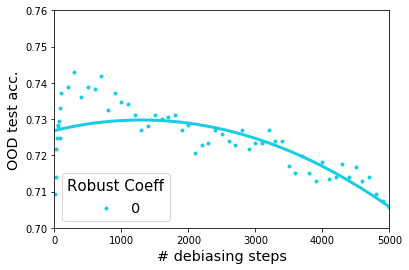

In [16]:
dict_key_to_limit = {"step": [1, 5000], "acc": [0.7, 0.76], "train_acc": [0.67, 0.87]}
fig = plot_iter(ll_m_diwa[:1], "step", orders=["2", "2"], key_axis1="acc", labels=robust_keys_diwa, legends=["Robust Coeff"])

In [ ]:
dict_key_to_limit = {"step": [1, 5000], "acc": [0.7, 0.76], "train_acc": [0.67, 0.87]}
fig = plot_iter(ll_m_llr, "step", orders=["2", "2"], key_axis1="train_acc", legends=["coeff"])

In [ ]:
def get_at_step(l_m, step):
    for l in l_m:
        if l["step"] == step:
            return l
    raise ValueError(step)
    

In [ ]:
steps = [100, 200, 500, 800, 1000, 1200, 1500, 2000, 2500, 3000, 4000]
labels = [f"{step}" for step in steps]
def get_llm(ll_m_diwa):
    ll_m = [
        [get_at_step(l_m_diwa, step) for l_m_diwa in ll_m_diwa]
        for step in steps]

    return ll_m


In [ ]:
plt.rcParams["figure.figsize"] = (6,6)
fig = plot_iter(get_llm(ll_m_r_top1), "train_acc", key_axis1="acc", labels=labels, legends=["step"], title="M=1", key_annot=None)

In [ ]:
plt.rcParams["figure.figsize"] = (6,6)
fig = plot_iter(get_llm(ll_m_r_diwa), "train_acc", key_axis1="acc", labels=labels, orders="2", legends=["step"], title="M=20", key_annot="robust")

In [ ]:
fig = plot_iter(get_llm(ll_m_diwa), "train_acc", key_axis1="acc", labels=labels, orders="2", legends=["step"], title="M=20")

In [ ]:
dict_key_to_limit = {"step": [-10, 5000], "acc": [0.69, 0.755], "train_acc": [0.7, 0.867]}
fig = plot_iter(get_llm(ll_m_top1), "train_acc", key_axis1="acc", labels=labels, orders="2", legends=["step"], title="Top 1")

In [ ]:
fig = plot_iter(ll_m, "train_acc", key_axis1="acc", labels=labels, orders="2", legends=["step"], title="M=20")

In [ ]:
dict_key_to_limit = {"step": [-10, 5000], "acc": [0.676, 0.702], "train_acc": [0.825, 0.872]}
fig = plot_iter(list(robust_lp.l.values()), "train_acc", key_axis1="acc", orders=2, labels=["M=1", "M=2", "M=5", "M=10", "M=15", "M=20"],  key_annot="robust", )

In [ ]:
plt.rcParams["figure.figsize"] = (8,4)
dict_key_to_limit = {"step": [-10, 5000], "acc": [0.6, 0.705], "train_acc": [0.825, 0.885]}
fig = plot_iter([robust_lp.l[1], robust_lp.l[2], robust_lp.l[20]], "robust", orders=["2", "1"], key_axis1="acc",key_axis2="train_acc", add_legend=True, key_annot="robust", labels=["M=1", "M=2", "M=20"])

In [ ]:
fig = plot_iter([robust_lp.l[20]], "train_acc", key_axis1="acc", add_legend=None,  key_annot="robust", title="M=20", orders=2)

In [ ]:
fig = plot_iter(ll_m_top1, "step", order="", add_legend=True, key_axis1="acc")

In [ ]:

fig = plot_iter(ll_m_top1, "step", order="", add_legend=True, key_axis1="train_acc", key_axis2=None)#"train_acc")

In [ ]:

fig = plot_iter(ll_m_diwa, "step", order="", add_legend=True, key_axis1="train_acc", key_axis2=None)#"train_acc")